# Assignment 10

### Q1.

In [2]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
text = """
Technology is evolving faster than ever before. Artificial intelligence is transforming industries and daily life.
Smartphones, smart homes, and smart assistants are now a part of everyday conversations.
Despite its benefits, technology raises concerns about privacy and addiction.
It's important to use tech responsibly to improve quality of life.
The future will likely be even more connected, with innovations we can't yet imagine.
"""

text_clean = text.lower()
text_clean = re.sub(r'[^\w\s]', '', text_clean)

word_tokens = word_tokenize(text_clean)
sentence_tokens = sent_tokenize(text)

split_tokens = text_clean.split()
print("Using split():", split_tokens)
print("\nUsing word_tokenize():", word_tokens)

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokens if word not in stop_words]

word_freq = Counter(filtered_words)

print("\nOriginal Paragraph:\n", text)
print("\nFiltered Tokens (no stopwords):\n", filtered_words)
print("\nWord Frequency (excluding stopwords):")
for word, freq in word_freq.items():
    print(f"{word}: {freq}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...


Using split(): ['technology', 'is', 'evolving', 'faster', 'than', 'ever', 'before', 'artificial', 'intelligence', 'is', 'transforming', 'industries', 'and', 'daily', 'life', 'smartphones', 'smart', 'homes', 'and', 'smart', 'assistants', 'are', 'now', 'a', 'part', 'of', 'everyday', 'conversations', 'despite', 'its', 'benefits', 'technology', 'raises', 'concerns', 'about', 'privacy', 'and', 'addiction', 'its', 'important', 'to', 'use', 'tech', 'responsibly', 'to', 'improve', 'quality', 'of', 'life', 'the', 'future', 'will', 'likely', 'be', 'even', 'more', 'connected', 'with', 'innovations', 'we', 'cant', 'yet', 'imagine']

Using word_tokenize(): ['technology', 'is', 'evolving', 'faster', 'than', 'ever', 'before', 'artificial', 'intelligence', 'is', 'transforming', 'industries', 'and', 'daily', 'life', 'smartphones', 'smart', 'homes', 'and', 'smart', 'assistants', 'are', 'now', 'a', 'part', 'of', 'everyday', 'conversations', 'despite', 'its', 'benefits', 'technology', 'raises', 'concerns'

[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


### Q2.

In [3]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

text = """
Technology is evolving faster than ever before. Artificial intelligence is transforming industries and daily life.
Smartphones, smart homes, and smart assistants are now a part of everyday conversations.
Despite its benefits, technology raises concerns about privacy and addiction.
It's important to use tech responsibly to improve quality of life.
The future will likely be even more connected, with innovations we can't yet imagine.
"""

alphabetic_words = re.findall(r'\b[a-zA-Z]+\b', text.lower())

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in alphabetic_words if word not in stop_words]

stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

print("\nFiltered Words (no stopwords):\n", filtered_words)
print("\nStemmed Words:\n", stemmed_words)
print("\nLemmatized Words:\n", lemmatized_words)
print("\nDifferences (stemmed vs lemmatized):")
for stem, lemma in zip(stemmed_words, lemmatized_words):
    if stem != lemma:
        print(f"{stem} --> {lemma}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...



Filtered Words (no stopwords):
 ['technology', 'evolving', 'faster', 'ever', 'artificial', 'intelligence', 'transforming', 'industries', 'daily', 'life', 'smartphones', 'smart', 'homes', 'smart', 'assistants', 'part', 'everyday', 'conversations', 'despite', 'benefits', 'technology', 'raises', 'concerns', 'privacy', 'addiction', 'important', 'use', 'tech', 'responsibly', 'improve', 'quality', 'life', 'future', 'likely', 'even', 'connected', 'innovations', 'yet', 'imagine']

Stemmed Words:
 ['technolog', 'evolv', 'faster', 'ever', 'artifici', 'intellig', 'transform', 'industri', 'daili', 'life', 'smartphon', 'smart', 'home', 'smart', 'assist', 'part', 'everyday', 'convers', 'despit', 'benefit', 'technolog', 'rais', 'concern', 'privaci', 'addict', 'import', 'use', 'tech', 'respons', 'improv', 'qualiti', 'life', 'futur', 'like', 'even', 'connect', 'innov', 'yet', 'imagin']

Lemmatized Words:
 ['technology', 'evolving', 'faster', 'ever', 'artificial', 'intelligence', 'transforming', 'indus

### Q3.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import pandas as pd

texts = [
    "This phone has an amazing battery life and sleek design.",
    "The camera quality of this phone is outstanding and worth every penny.",
    "Battery drains quickly but the performance and display are impressive."
]

count_vectorizer = CountVectorizer(stop_words='english')
bow = count_vectorizer.fit_transform(texts)

print("Bag of Words (BoW) Representation:")
print(pd.DataFrame(bow.toarray(), columns=count_vectorizer.get_feature_names_out()))

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(texts)

print("\nTF-IDF Scores:")
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(df_tfidf)
print("\nTop 3 Keywords for Each Text:")
for i, row in enumerate(tfidf.toarray()):
    top_indices = row.argsort()[-3:][::-1]  # Top 3
    top_words = [(tfidf_vectorizer.get_feature_names_out()[idx], row[idx]) for idx in top_indices]
    print(f"Text {i+1}:")
    for word, score in top_words:
        print(f"  {word}: {score:.4f}")

Bag of Words (BoW) Representation:
   amazing  battery  camera  design  display  drains  impressive  life  \
0        1        1       0       1        0       0           0     1   
1        0        0       1       0        0       0           0     0   
2        0        1       0       0        1       1           1     0   

   outstanding  penny  performance  phone  quality  quickly  sleek  worth  
0            0      0            0      1        0        0      1      0  
1            1      1            0      1        1        0      0      1  
2            0      0            1      0        0        1      0      0  

TF-IDF Scores:
    amazing   battery    camera    design   display    drains  impressive  \
0  0.440362  0.334907  0.000000  0.440362  0.000000  0.000000    0.000000   
1  0.000000  0.000000  0.423394  0.000000  0.000000  0.000000    0.000000   
2  0.000000  0.322002  0.000000  0.000000  0.423394  0.423394    0.423394   

       life  outstanding     penny  per

### Q4.

In [6]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

text1 = """
Artificial Intelligence (AI) is a branch of computer science that aims to create systems capable of performing tasks that typically require human intelligence.
These include learning, reasoning, problem-solving, and natural language understanding.
"""
text2 = """
Blockchain is a distributed ledger technology that records transactions across multiple computers securely.
It ensures data transparency, immutability, and decentralization, making it ideal for cryptocurrencies and smart contracts.
"""

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    return tokens

tokens1 = preprocess(text1)
tokens2 = preprocess(text2)
print("Tokens from Text 1 (AI):", tokens1)
print("Tokens from Text 2 (Blockchain):", tokens2)

set1 = set(tokens1)
set2 = set(tokens2)

intersection = set1.intersection(set2)
union = set1.union(set2)

jaccard_similarity = len(intersection) / len(union)
print(f"\nJaccard Similarity: {jaccard_similarity:.4f}")

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([text1, text2])
cos_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print(f"Cosine Similarity: {cos_sim[0][0]:.4f}")

if cos_sim[0][0] > jaccard_similarity:
    print("\nCosine Similarity gives a better insight into semantic similarity, especially when vocabulary differs.")
else:
    print("\nJaccard Similarity is more useful when comparing exact word overlap.")

Tokens from Text 1 (AI): ['artificial', 'intelligence', 'ai', 'is', 'a', 'branch', 'of', 'computer', 'science', 'that', 'aims', 'to', 'create', 'systems', 'capable', 'of', 'performing', 'tasks', 'that', 'typically', 'require', 'human', 'intelligence', 'these', 'include', 'learning', 'reasoning', 'problemsolving', 'and', 'natural', 'language', 'understanding']
Tokens from Text 2 (Blockchain): ['blockchain', 'is', 'a', 'distributed', 'ledger', 'technology', 'that', 'records', 'transactions', 'across', 'multiple', 'computers', 'securely', 'it', 'ensures', 'data', 'transparency', 'immutability', 'and', 'decentralization', 'making', 'it', 'ideal', 'for', 'cryptocurrencies', 'and', 'smart', 'contracts']

Jaccard Similarity: 0.0784
Cosine Similarity: 0.0808

Cosine Similarity gives a better insight into semantic similarity, especially when vocabulary differs.


### Q5.

Review Classification:

Review: "This vacuum cleaner is amazing! It picks up everything and is super quiet."
→ Polarity: 0.27, Subjectivity: 0.47, Sentiment: Positive

Review: "The battery life on this phone is disappointing. Drains quickly."
→ Polarity: -0.13, Subjectivity: 0.60, Sentiment: Negative

Review: "Customer service was okay, nothing exceptional."
→ Polarity: 0.58, Subjectivity: 0.75, Sentiment: Positive

Review: "Absolutely love this coffee machine. Best purchase of the year!"
→ Polarity: 0.75, Subjectivity: 0.45, Sentiment: Positive

Review: "The app crashes frequently. Very frustrating experience."
→ Polarity: -0.52, Subjectivity: 1.00, Sentiment: Negative



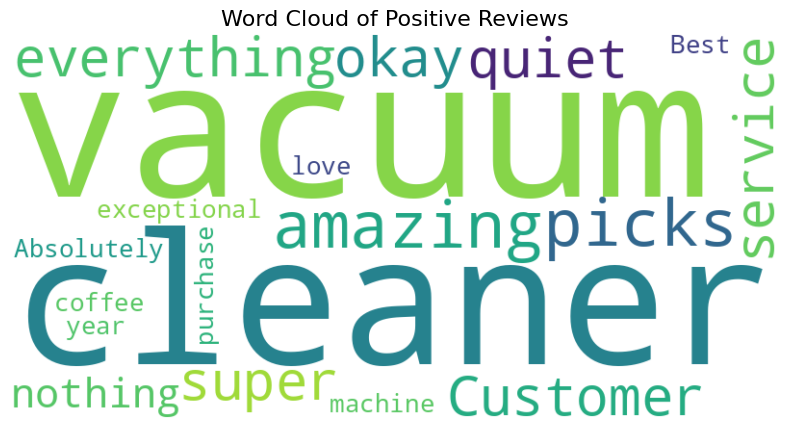

In [7]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = [
    "This vacuum cleaner is amazing! It picks up everything and is super quiet.",
    "The battery life on this phone is disappointing. Drains quickly.",
    "Customer service was okay, nothing exceptional.",
    "Absolutely love this coffee machine. Best purchase of the year!",
    "The app crashes frequently. Very frustrating experience."
]
classified_reviews = []

for review in reviews:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    if polarity > 0.1:
        sentiment = "Positive"
    elif polarity < -0.1:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    classified_reviews.append((review, polarity, subjectivity, sentiment))

print("Review Classification:\n")
for review, pol, sub, senti in classified_reviews:
    print(f"Review: \"{review}\"\n→ Polarity: {pol:.2f}, Subjectivity: {sub:.2f}, Sentiment: {senti}\n")

positive_text = " ".join([r[0] for r in classified_reviews if r[3] == "Positive"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Positive Reviews", fontsize=16)
plt.show()

### Q6.

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

text = "Machine learning is fun and exciting to learn"

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

words = text.split()
sequences = []
for i in range(1, len(words)):
    seq = words[:i+1]
    tokenized_seq = tokenizer.texts_to_sequences([' '.join(seq)])[0]
    sequences.append(tokenized_seq)

X = []
y = []
for seq in sequences:
    X.append(seq[:-1])
    y.append(seq[-1])
X = pad_sequences(X)
y = np.array(y)

vocab_size = len(tokenizer.word_index) + 1
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=10, input_length=X.shape[1]))
model.add(LSTM(50))
model.add(Dense(50, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()
model.fit(X, y, epochs=300, verbose=0)

def generate_text(seed_text, next_words, model, tokenizer, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted_probs)
        output_word = ''
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        if output_word == '':
            break
        seed_text += " " + output_word
    return seed_text
generated = generate_text("Machine", 3, model, tokenizer, max_sequence_len=X.shape[1]+1)
print("Generated Text:", generated)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Generated Text: Machine learning is fun
